In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns
pal = sns.color_palette("colorblind")

import astropy.units as u
from astropy.table import QTable

import warnings
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
# Load Full Data
full_ideal_res = QTable.read("Data/Full_Ideal_CloudyResults_wNHII.fits")

vel_mask = full_ideal_res["MEAS_V_CIV"]>=150*u.km/u.s

not_photo_mask = full_ideal_res["N_CIV"]/full_ideal_res["MEAS_N_CIV"] < .1
not_photo_mask &= full_ideal_res["N_SiIV"]/full_ideal_res["MEAS_N_SiIV"] < .1

full_ideal_res = full_ideal_res[vel_mask & not_photo_mask]

good_col_meas_mask = (full_ideal_res["CIV_to_SiIV_BAD"] | 
                  full_ideal_res["CIV_to_SiIV_LL"] | 
                  full_ideal_res["CIV_to_SiIV_UL"])

good_col_meas_mask = np.invert(good_col_meas_mask)


good_col_meas_mask_OC = ((full_ideal_res["MEAS_ERR_N_CIV"] < 0) | 
                  (full_ideal_res["MEAS_ERR_N_OVI"] < 0) | 
                  np.isnan(full_ideal_res["MEAS_ERR_N_OVI"]) | 
                         np.isnan(full_ideal_res["MEAS_ERR_N_CIV"]))

good_col_meas_mask_OC = np.invert(good_col_meas_mask_OC)


good_col_meas_mask_OS = ((full_ideal_res["MEAS_ERR_N_SiIV"] < 0) | 
                  (full_ideal_res["MEAS_ERR_N_OVI"] < 0) | 
                  np.isnan(full_ideal_res["MEAS_ERR_N_OVI"]) | 
                         np.isnan(full_ideal_res["MEAS_ERR_N_SiIV"]))

good_col_meas_mask_OS = np.invert(good_col_meas_mask_OS)


In [3]:
# No metallicity dependence for CIE for T> 1e4 K
CIE_T, CIE_HII, CIE_CIV, CIE_OVI, CIE_SiIV = np.loadtxt("Data/Gnat2007_Models/CIE_Z1.txt", 
                                                        skiprows = 126, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)



In [4]:
# Time dependent

ISOB_Z1_T, ISOB_Z1_HII, ISOB_Z1_CIV, ISOB_Z1_OVI, ISOB_Z1_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOB_Z1.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOCh_Z1_T, ISOCh_Z1_HII, ISOCh_Z1_CIV, ISOCh_Z1_OVI, ISOCh_Z1_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOCh_Z1.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOB_Zp1_T, ISOB_Zp1_HII, ISOB_Zp1_CIV, ISOB_Zp1_OVI, ISOB_Zp1_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOB_Z-1.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOCh_Zp1_T, ISOCh_Zp1_HII, ISOCh_Zp1_CIV, ISOCh_Zp1_OVI, ISOCh_Zp1_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOCh_Z-1.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)


ISOB_Zp01_T, ISOB_Zp01_HII, ISOB_Zp01_CIV, ISOB_Zp01_OVI, ISOB_Zp01_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOB_Z-2.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOCh_Zp01_T, ISOCh_Zp01_HII, ISOCh_Zp01_CIV, ISOCh_Zp01_OVI, ISOCh_Zp01_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOCh_Z-2.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOB_Zp001_T, ISOB_Zp001_HII, ISOB_Zp001_CIV, ISOB_Zp001_OVI, ISOB_Zp001_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOB_Z-3.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)

ISOCh_Zp001_T, ISOCh_Zp001_HII, ISOCh_Zp001_CIV, ISOCh_Zp001_OVI, ISOCh_Zp001_SiIV = np.loadtxt(
                                                        "Data/Gnat2007_Models/ISOCh_Z-3.txt", 
                                                        skiprows = 124, 
                                                        usecols = [0,2,9,26,57],
                                                        unpack = True)



In [5]:
#Abundances
#solar

logO_abund_solar = 8.69
logC_abund_solar = 8.43
logSi_abund_solar = 7.51

logO_abund = logO_abund_solar - 12
logC_abund = logC_abund_solar - 12
logSi_abund = logSi_abund_solar - 12


In [6]:
# Get Ratios
# CIV/SiIV

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    N_H = 22 # placeholder log column
    N_Si_Z1 = N_H + logSi_abund
    N_C_Z1 = N_H + logC_abund
    N_O_Z1 = N_H + logO_abund

    #CIE
    N_HII_CIE = N_H + np.log10(CIE_HII)

    N_SiIV_CIE = N_Si_Z1 + np.log10(CIE_SiIV)
    N_CIV_CIE = N_C_Z1 + np.log10(CIE_CIV)
    N_OVI_CIE = N_O_Z1 + np.log10(CIE_OVI)

    CIV_to_SiIV_CIE = N_CIV_CIE - N_SiIV_CIE
    OVI_to_CIV_CIE = N_OVI_CIE - N_CIV_CIE
    OVI_to_SiIV_CIE = N_OVI_CIE - N_SiIV_CIE
    HII_to_OVI_CIE = N_HII_CIE - N_OVI_CIE

    #ISOB Solar
    N_HII_ISOB_Z1 = N_H + np.log10(ISOB_Z1_HII)

    N_SiIV_ISOB_Z1 = N_Si_Z1 + np.log10(ISOB_Z1_SiIV)
    N_CIV_ISOB_Z1 = N_C_Z1 + np.log10(ISOB_Z1_CIV)
    N_OVI_ISOB_Z1 = N_O_Z1 + np.log10(ISOB_Z1_OVI)

    CIV_to_SiIV_ISOB_Z1 = N_CIV_ISOB_Z1 - N_SiIV_ISOB_Z1
    OVI_to_CIV_ISOB_Z1 = N_OVI_ISOB_Z1 - N_CIV_ISOB_Z1
    OVI_to_SiIV_ISOB_Z1 = N_OVI_ISOB_Z1 - N_SiIV_ISOB_Z1
    

    #ISOCh Solar
    N_HII_ISOCh_Z1 = N_H + np.log10(ISOCh_Z1_HII)

    N_SiIV_ISOCh_Z1 = N_Si_Z1 + np.log10(ISOCh_Z1_SiIV)
    N_CIV_ISOCh_Z1 = N_C_Z1 + np.log10(ISOCh_Z1_CIV)
    N_OVI_ISOCh_Z1 = N_O_Z1 + np.log10(ISOCh_Z1_OVI)

    CIV_to_SiIV_ISOCh_Z1 = N_CIV_ISOCh_Z1 - N_SiIV_ISOCh_Z1
    OVI_to_CIV_ISOCh_Z1 = N_OVI_ISOCh_Z1 - N_CIV_ISOCh_Z1
    OVI_to_SiIV_ISOCh_Z1 = N_OVI_ISOCh_Z1 - N_SiIV_ISOCh_Z1




    #ISOB .1 Solar
    N_HII_ISOB_Zp1 = N_H + np.log10(ISOB_Zp1_HII)

    N_SiIV_ISOB_Zp1 = N_Si_Z1 - 1 + np.log10(ISOB_Zp1_SiIV)
    N_CIV_ISOB_Zp1 = N_C_Z1 - 1 + np.log10(ISOB_Zp1_CIV)
    N_OVI_ISOB_Zp1 = N_O_Z1 - 1 + np.log10(ISOB_Zp1_OVI)

    CIV_to_SiIV_ISOB_Zp1 = N_CIV_ISOB_Zp1 - N_SiIV_ISOB_Zp1
    OVI_to_CIV_ISOB_Zp1 = N_OVI_ISOB_Zp1 - N_CIV_ISOB_Zp1
    OVI_to_SiIV_ISOB_Zp1 = N_OVI_ISOB_Zp1 - N_SiIV_ISOB_Zp1
    HII_to_OVI_ISOB_Zp1 = N_HII_ISOB_Zp1 - N_OVI_ISOB_Zp1

    #ISOCh .1 Solar
    N_HII_ISOCh_Zp1 = N_H + np.log10(ISOCh_Zp1_HII)

    N_SiIV_ISOCh_Zp1 = N_Si_Z1 - 1 + np.log10(ISOCh_Zp1_SiIV)
    N_CIV_ISOCh_Zp1 = N_C_Z1 - 1 + np.log10(ISOCh_Zp1_CIV)
    N_OVI_ISOCh_Zp1 = N_O_Z1 - 1 + np.log10(ISOCh_Zp1_OVI)

    CIV_to_SiIV_ISOCh_Zp1 = N_CIV_ISOCh_Zp1 - N_SiIV_ISOCh_Zp1
    OVI_to_CIV_ISOCh_Zp1 = N_OVI_ISOCh_Zp1 - N_CIV_ISOCh_Zp1
    OVI_to_SiIV_ISOCh_Zp1 = N_OVI_ISOCh_Zp1 - N_SiIV_ISOCh_Zp1
    HII_to_OVI_ISOCh_Zp1 = N_HII_ISOCh_Zp1 - N_OVI_ISOCh_Zp1
    
    
    
    
    
    #ISOB .01 Solar
    N_HII_ISOB_Zp01 = N_H + np.log10(ISOB_Zp01_HII)

    N_SiIV_ISOB_Zp01 = N_Si_Z1 - 2 + np.log10(ISOB_Zp01_SiIV)
    N_CIV_ISOB_Zp01 = N_C_Z1 - 2 + np.log10(ISOB_Zp01_CIV)
    N_OVI_ISOB_Zp01 = N_O_Z1 - 2 + np.log10(ISOB_Zp01_OVI)

    CIV_to_SiIV_ISOB_Zp01 = N_CIV_ISOB_Zp01 - N_SiIV_ISOB_Zp01
    OVI_to_CIV_ISOB_Zp01 = N_OVI_ISOB_Zp01 - N_CIV_ISOB_Zp01
    OVI_to_SiIV_ISOB_Zp01 = N_OVI_ISOB_Zp01 - N_SiIV_ISOB_Zp01

    #ISOCh .01 Solar
    N_HII_ISOCh_Zp01 = N_H + np.log10(ISOCh_Zp01_HII)

    N_SiIV_ISOCh_Zp01 = N_Si_Z1 - 2 + np.log10(ISOCh_Zp01_SiIV)
    N_CIV_ISOCh_Zp01 = N_C_Z1 - 2 + np.log10(ISOCh_Zp01_CIV)
    N_OVI_ISOCh_Zp01 = N_O_Z1 - 2 + np.log10(ISOCh_Zp01_OVI)

    CIV_to_SiIV_ISOCh_Zp01 = N_CIV_ISOCh_Zp01 - N_SiIV_ISOCh_Zp01
    OVI_to_CIV_ISOCh_Zp01 = N_OVI_ISOCh_Zp01 - N_CIV_ISOCh_Zp01
    OVI_to_SiIV_ISOCh_Zp01 = N_OVI_ISOCh_Zp01 - N_SiIV_ISOCh_Zp01
    
    
    
    
    
    #ISOB .001 Solar
    N_HII_ISOB_Zp001 = N_H + np.log10(ISOB_Zp001_HII)

    N_SiIV_ISOB_Zp001 = N_Si_Z1 - 3 + np.log10(ISOB_Zp001_SiIV)
    N_CIV_ISOB_Zp001 = N_C_Z1 - 3 + np.log10(ISOB_Zp001_CIV)
    N_OVI_ISOB_Zp001 = N_O_Z1 - 3 + np.log10(ISOB_Zp001_OVI)

    CIV_to_SiIV_ISOB_Zp001 = N_CIV_ISOB_Zp001 - N_SiIV_ISOB_Zp001
    OVI_to_CIV_ISOB_Zp001 = N_OVI_ISOB_Zp001 - N_CIV_ISOB_Zp001
    OVI_to_SiIV_ISOB_Zp001 = N_OVI_ISOB_Zp001 - N_SiIV_ISOB_Zp001

    #ISOCh .001 Solar
    N_HII_ISOCh_Zp001 = N_H + np.log10(ISOCh_Zp001_HII)

    N_SiIV_ISOCh_Zp001 = N_Si_Z1 - 3 + np.log10(ISOCh_Zp001_SiIV)
    N_CIV_ISOCh_Zp001 = N_C_Z1 - 3 + np.log10(ISOCh_Zp001_CIV)
    N_OVI_ISOCh_Zp001 = N_O_Z1 - 3 + np.log10(ISOCh_Zp001_OVI)

    CIV_to_SiIV_ISOCh_Zp001 = N_CIV_ISOCh_Zp001 - N_SiIV_ISOCh_Zp001
    OVI_to_CIV_ISOCh_Zp001 = N_OVI_ISOCh_Zp001 - N_CIV_ISOCh_Zp001
    OVI_to_SiIV_ISOCh_Zp001 = N_OVI_ISOCh_Zp001 - N_SiIV_ISOCh_Zp001
    
    
    


<IPython.core.display.Javascript object>


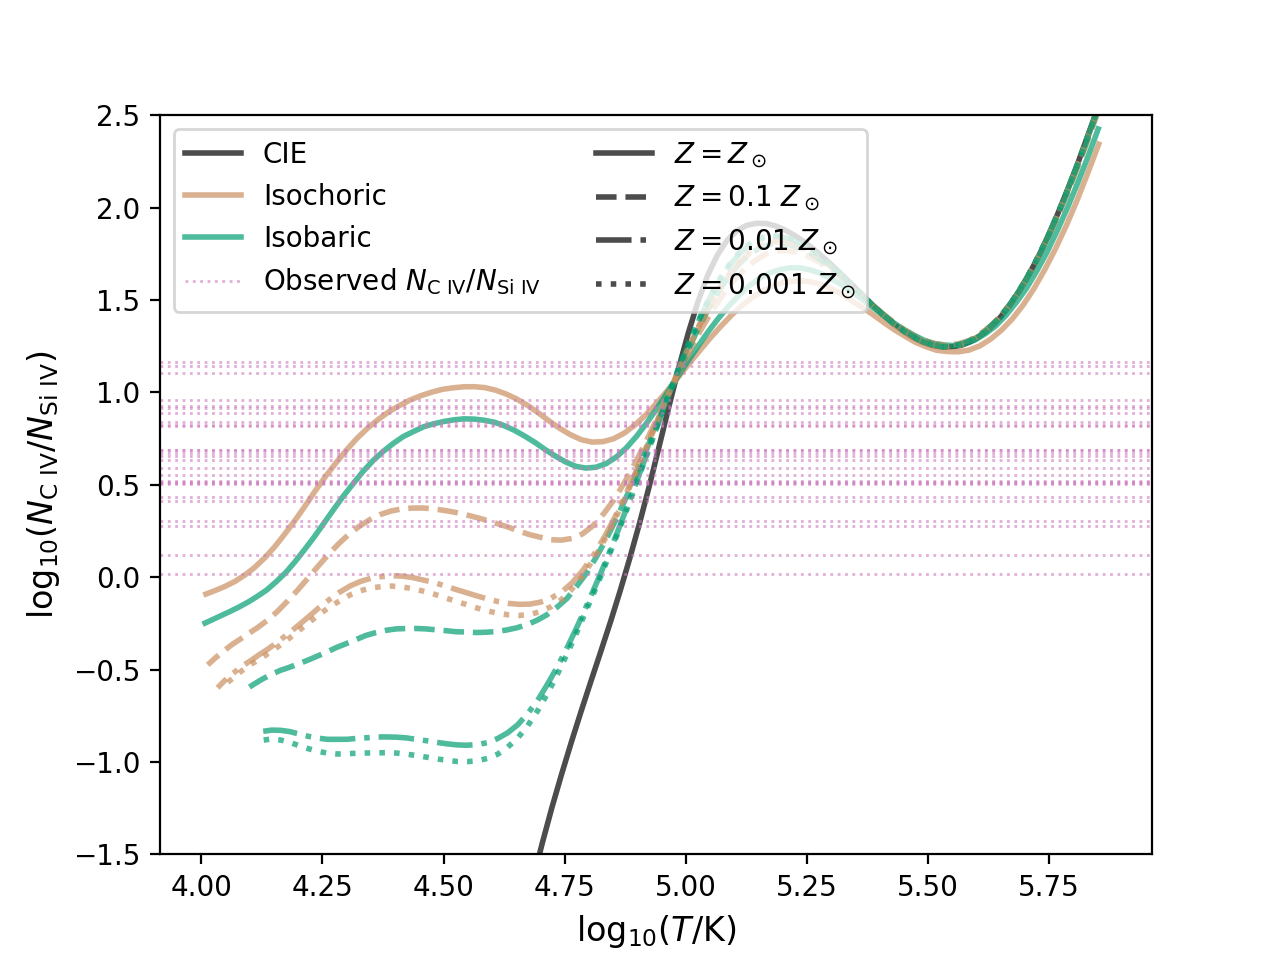

In [33]:
fig,ax = plt.subplots()

ax.plot(np.log10(CIE_T), CIV_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), CIV_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), CIV_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), CIV_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), CIV_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), CIV_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), CIV_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), CIV_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), CIV_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["CIV_to_SiIV"][good_col_meas_mask]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1, 
                   label = r"Observed $N_\mathrm{C~IV} / N_\mathrm{Si~IV}$")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1)

ax.axhline(-3, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
ax.axhline(-3, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
ax.axhline(-3, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
ax.axhline(-3, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 2, loc = 2)

ax.set_ylim(-1.5,2.5)

ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{C~IV} / N_\mathrm{Si~IV})$", fontsize = 12)

fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/ModelBased_CIV_SiIV_Ratios_vTemp.png", 
            dpi = 300, transparent = True)

fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.png", 
            dpi = 300, transparent = True)
fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.svg", 
            transparent = True)

<IPython.core.display.Javascript object>


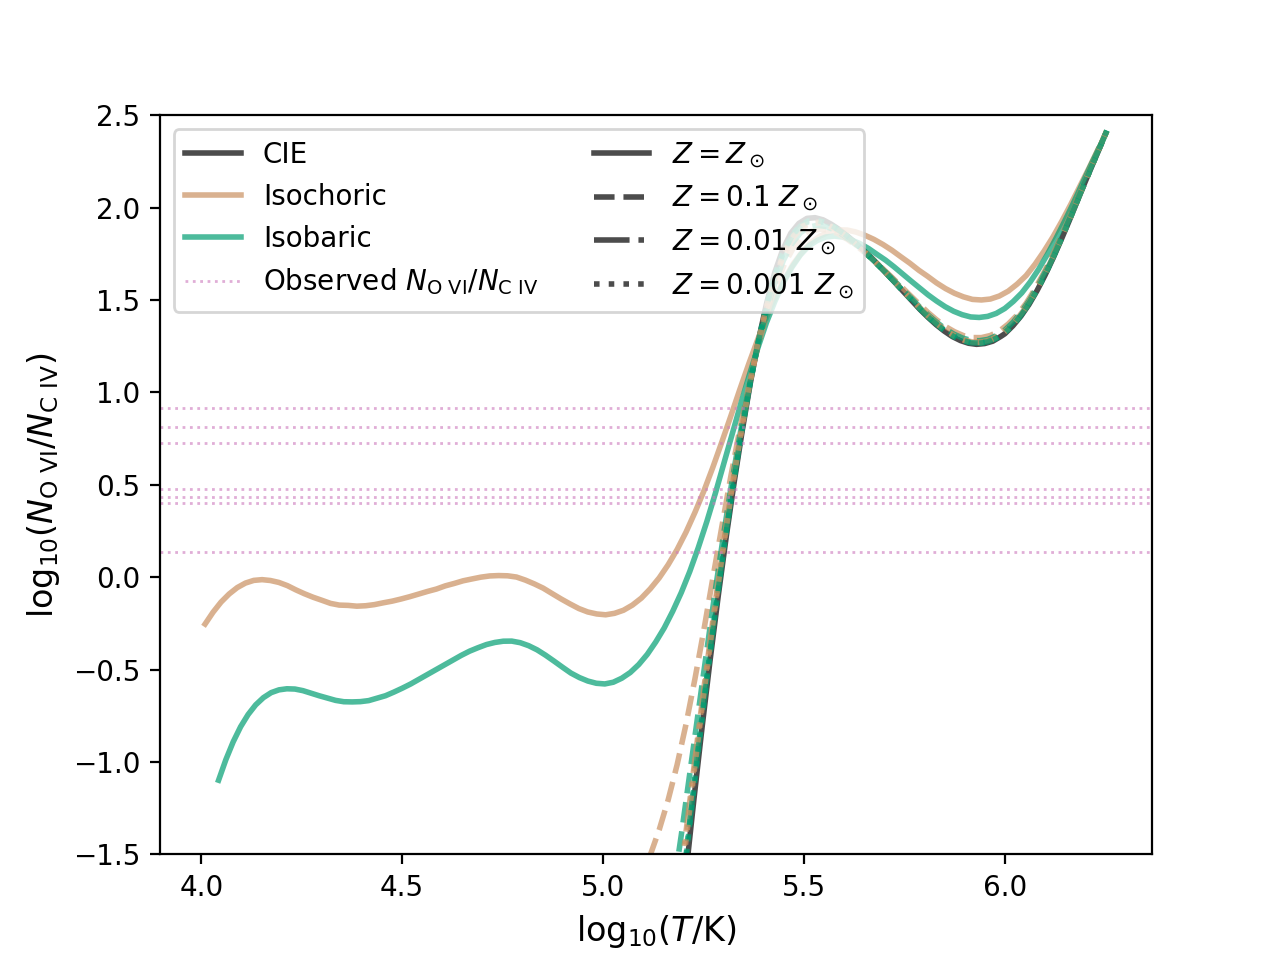

In [35]:
fig,ax = plt.subplots()

ax.plot(np.log10(CIE_T), OVI_to_CIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), OVI_to_CIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), OVI_to_CIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_CIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), OVI_to_CIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_CIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), OVI_to_CIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_CIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), OVI_to_CIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["OVI_to_CIV"][good_col_meas_mask_OC]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1, 
                   label = r"Observed $N_\mathrm{O~VI} / N_\mathrm{C~IV}$")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1)

ax.axhline(-3, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
ax.axhline(-3, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
ax.axhline(-3, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
ax.axhline(-3, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 2, loc = 2)

ax.set_ylim(-1.5,2.5)

ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{C~IV})$", fontsize = 12)

fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/ModelBased_OVI_CIV_Ratios_vTemp.png", 
            dpi = 300, transparent = True)

# fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.png", 
#             dpi = 300, transparent = True)
# fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.svg", 
#             transparent = True)

<IPython.core.display.Javascript object>


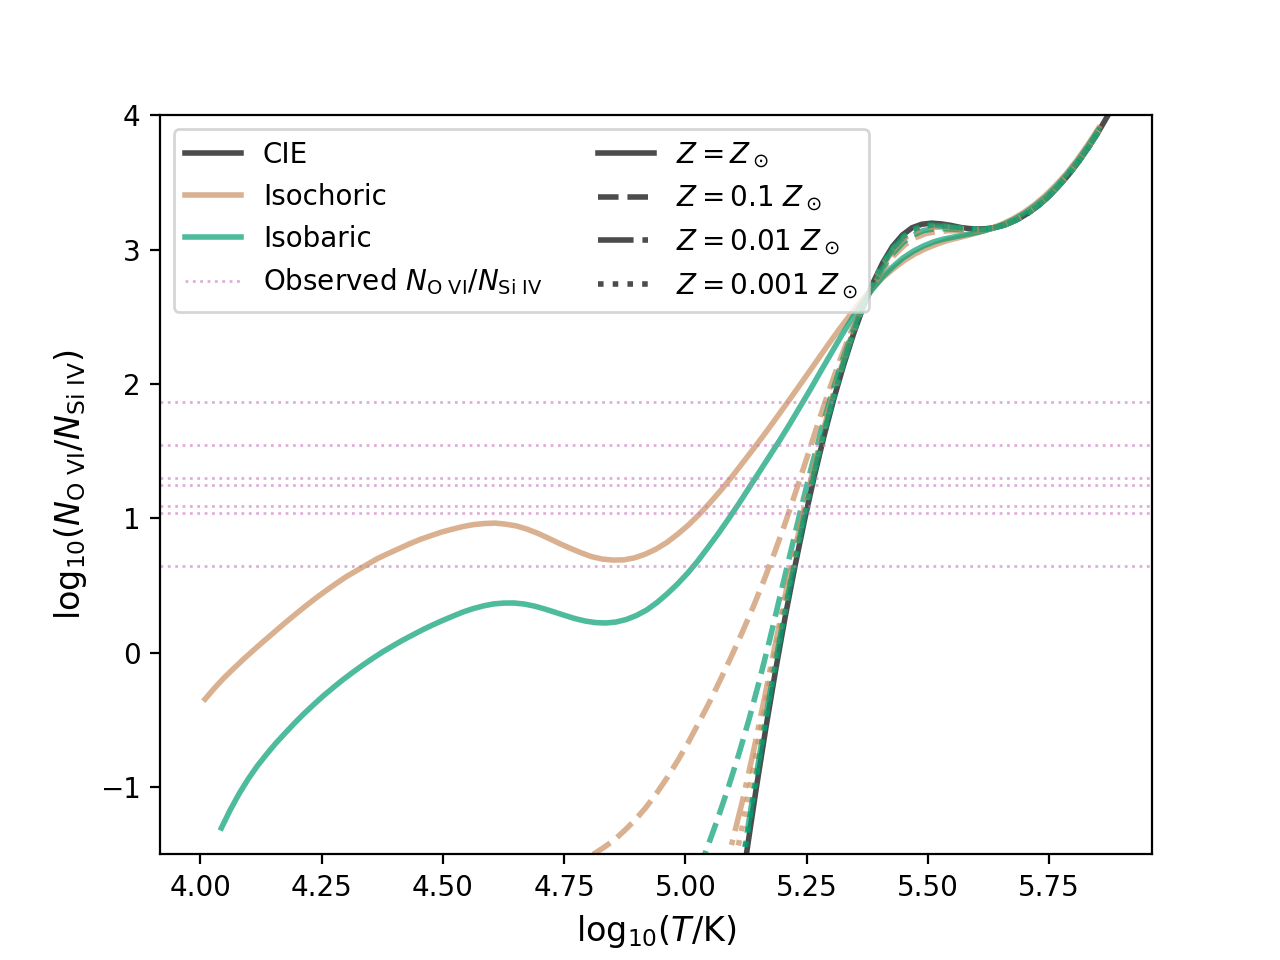

In [40]:
fig,ax = plt.subplots()

ax.plot(np.log10(CIE_T), OVI_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), OVI_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), OVI_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), OVI_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), OVI_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), OVI_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["OVI_to_SiIV"][good_col_meas_mask_OS]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1, 
                   label = r"Observed $N_\mathrm{O~VI} / N_\mathrm{Si~IV}$")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1)

ax.axhline(-3, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
ax.axhline(-3, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
ax.axhline(-3, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
ax.axhline(-3, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 2, loc = 2)

ax.set_ylim(-1.5,4)

ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{Si~IV})$", fontsize = 12)

fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/ModelBased_OVI_SiIV_Ratios_vTemp.png", 
            dpi = 300, transparent = True)

# fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.png", 
#             dpi = 300, transparent = True)
# fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.svg", 
#             transparent = True)

## ED Figure 3


<IPython.core.display.Javascript object>


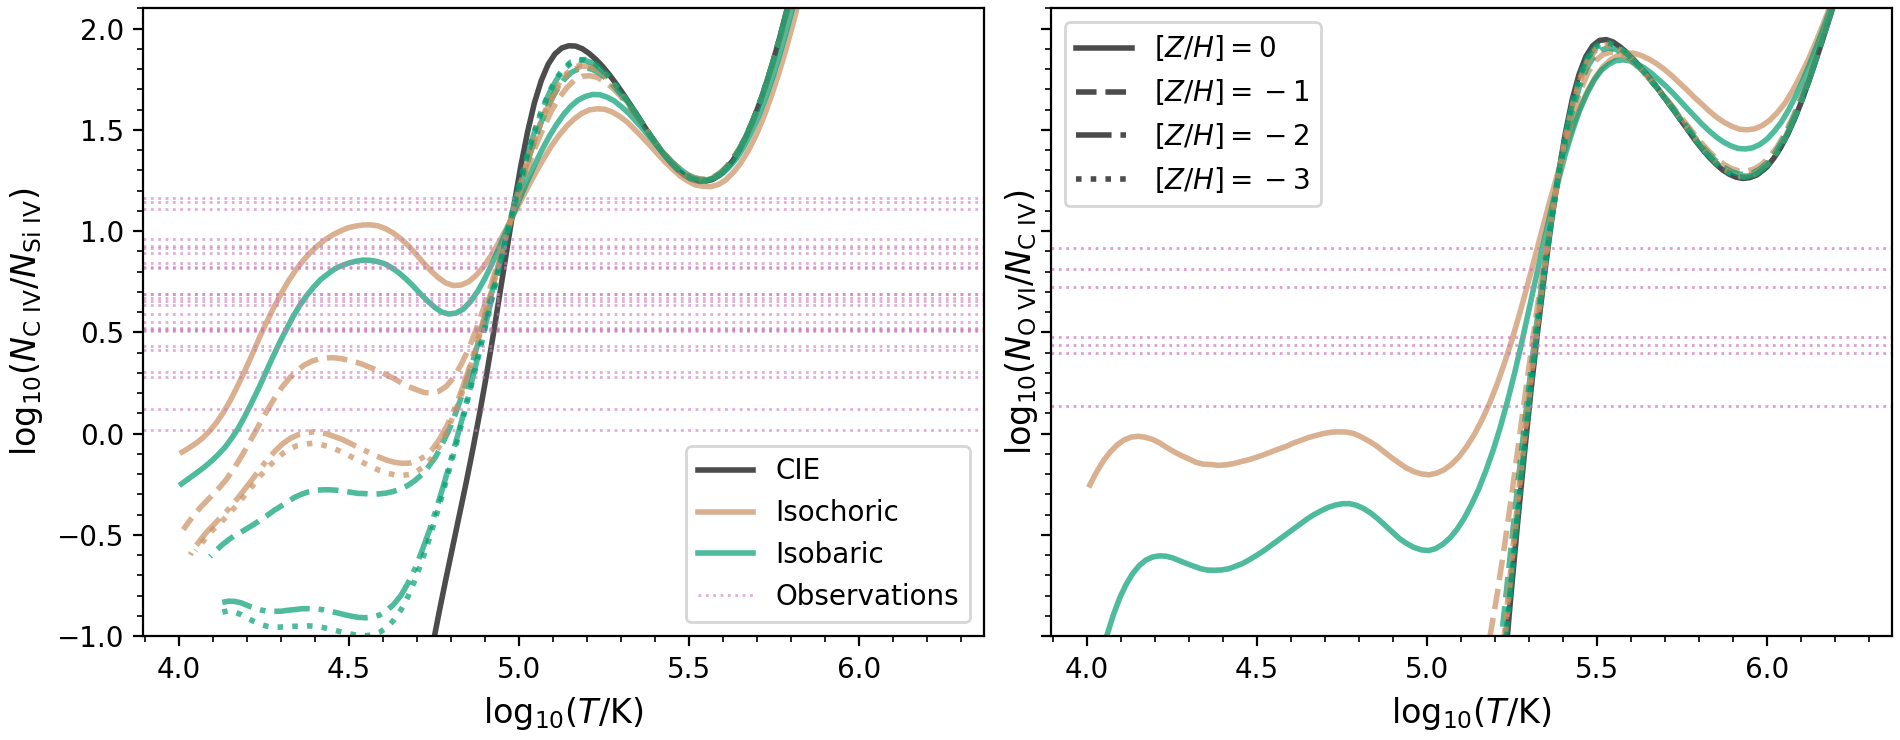

In [12]:
fig,axs = plt.subplots(1,2, figsize = (9.5,3.7), constrained_layout = True, sharex = True, sharey = True)

ax = axs[0]

ax.plot(np.log10(CIE_T), CIV_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), CIV_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), CIV_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), CIV_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), CIV_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), CIV_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), CIV_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), CIV_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), CIV_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["CIV_to_SiIV"][good_col_meas_mask]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1, 
                   label = "Observations")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1)

# ax.axhline(-3, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
# ax.axhline(-3, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
# ax.axhline(-3, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
# ax.axhline(-3, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 1, loc = 4)

# ax.set_ylim(-1.5,2.5)

ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{C~IV} / N_\mathrm{Si~IV})$", fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax = axs[1]

ax.plot(np.log10(CIE_T), OVI_to_CIV_CIE, lw = 2, color = "k", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), OVI_to_CIV_ISOCh_Z1, lw = 2, color = pal[5],alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), OVI_to_CIV_ISOB_Z1, lw = 2, color = pal[2], alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_CIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), OVI_to_CIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_CIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), OVI_to_CIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_CIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), OVI_to_CIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["OVI_to_CIV"][good_col_meas_mask_OC]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)
    else:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)

ax.axhline(-8, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$[Z/H] = 0$")
ax.axhline(-8, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$[Z/H] = -1$")
ax.axhline(-8, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$[Z/H] = -2$")
ax.axhline(-8, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$[Z/H] = -3$")


lg = ax.legend(fontsize = 10, ncol = 1, loc = 2)


ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{C~IV})$", fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# ax = axs[2]

# ax.plot(np.log10(CIE_T), OVI_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


# ax.plot(np.log10(ISOCh_Z1_T), OVI_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
#         label = "Isochoric", alpha = 0.7)
# ax.plot(np.log10(ISOB_Z1_T), OVI_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
#         label = "Isobaric", alpha = 0.7)

# ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
# ax.plot(np.log10(ISOB_Zp1_T), OVI_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


# ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
# ax.plot(np.log10(ISOB_Zp01_T), OVI_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

# ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
# ax.plot(np.log10(ISOB_Zp001_T), OVI_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


# for ell,y in enumerate(full_ideal_res["OVI_to_SiIV"][good_col_meas_mask_OS]):
#     if ell == 0:
#         ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1, 
#                    label = r"Observed $N_\mathrm{O~VI} / N_\mathrm{Si~IV}$")
#     else:
#         ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)



# ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
# ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{Si~IV})$", fontsize = 12)

ax.set_ylim(-1,2.1)

# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))


fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.png", 
            dpi = 300, transparent = True)
fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/svg/ExtFigure3.svg", 
            transparent = True)

In [11]:
full_ideal_res[good_col_meas_mask_OC]

SOURCE,COMP_NUM,n_H,PHI(H),N_HI,N_HII,N_SiII,N_SiIII,N_SiIV,N_CII,N_CIV,N_FeII,N_AlII,N_NI,N_SII,N_OI,N_OVI,Te,STOP_COL_REACHED,bg_n_H,bg_PHI(H),bg_N_HI,bg_N_HII,bg_N_SiII,bg_N_SiIII,bg_N_SiIV,bg_N_CII,bg_N_CIV,bg_N_FeII,bg_N_AlII,bg_N_NI,bg_N_SII,bg_N_OI,bg_N_OVI,bg_Te,bg_STOP_COL_REACHED,v,MEAS_V_CIV,MEAS_N_CIV,MEAS_ERR_N_CIV,B_CIV,ERR_B_CIV,MEAS_N_SiIV,MEAS_ERR_N_SiIV,B_SiIV,ERR_B_SiIV,MEAS_N_OVI,MEAS_ERR_N_OVI,B_OVI,ERR_B_OVI,LOW_v,MEAS_N_CII,MEAS_ERR_N_CII,B_CII,ERR_B_CII,MEAS_N_SiII,MEAS_ERR_N_SiII,B_SiII,ERR_B_SiII,MEAS_N_AlII,MEAS_ERR_N_AlII,B_AlII,ERR_B_AlII,LMC_B,CIV_to_SiIV,OVI_to_SiIV,OVI_to_CIV,CIV_to_SiIV_err,OVI_to_SiIV_err,OVI_to_CIV_err,CIV_to_SiIV_LL,OVI_to_SiIV_LL,OVI_to_CIV_LL,CIV_to_SiIV_UL,OVI_to_SiIV_UL,OVI_to_CIV_UL,CIV_to_SiIV_BAD,OVI_to_SiIV_BAD,OVI_to_CIV_BAD,RATIO_LOGT_FIRST,RATIO_LOGT_FIRST_ERR,RATIO_LOGT_SECOND,RATIO_LOGT_SECOND_ERR,RATIO_LOGT_THIRD,RATIO_LOGT_THIRD_ERR,N_HII_FIRST_CIV,N_HII_FIRST_CIV_ERR,N_HII_FIRST_SiIV,N_HII_FIRST_SiIV_ERR,N_HII_SECOND_CIV,N_HII_SECOND_CIV_ERR,N_HII_SECOND_SiIV,N_HII_SECOND_SiIV_ERR,N_HII_THIRD_CIV,N_HII_THIRD_CIV_ERR,N_HII_THIRD_SiIV,N_HII_THIRD_SiIV_ERR,N_HII_BAD,N_HII_BAD_CIV,N_HII_BAD_SiIV,RATIO_LOGT_ISOCh,RATIO_LOGT_ISOCh_ERR,RATIO_LOGT_ISOB,RATIO_LOGT_ISOB_ERR,N_HII_ISOCh_CIV,N_HII_ISOCh_CIV_ERR,N_HII_ISOCh_SiIV,N_HII_ISOCh_SiIV_ERR,N_HII_ISOB_CIV,N_HII_ISOB_CIV_ERR,N_HII_ISOB_SiIV,N_HII_ISOB_SiIV_ERR
,,1 / cm3,ph / s,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,K,,1 / cm3,ph / s,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,1 / cm2,K,,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,1 / cm2,1 / cm2,km / s,km / s,kpc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes23,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1H0419-577,5,0.018921693353828553,159342.63695087915,3.45115e+16,2.58218e+18,6558350000000.0,12670400000000.0,171587000000.0,69873600000000.0,154597000000.0,1260440000000.0,1416410000000.0,293924000000.0,4070410000000.0,3697390000000.0,56270.9,12416.523075924119,True,0.1856312119051715,40830.5283724255,2.66013e+17,5.54945e+17,5940530000000.0,117483000000.0,279398000.0,39371100000000.0,0.0,4482950000000.0,509878000000.0,4000480000000.0,3022300000000.0,32136700000000.0,0.0,16255.48755750485,True,322.50101914736825,325.7611807041106,35253143168375.836,2514095669599.2656,24.058009191376968,2.1326604497028097,5346526902066.543,686082125362.6395,14.277918677622548,2.6619559244839945,106131677818202.19,31089922050860.027,16.4715948425997,8.395795918259788,343.4109659793403,79574137999387.92,6687538158709.308,14.951045732022937,1.3448844477220816,4869814241081.894,347817628908.0548,16.67440457906782,1.4597198040547066,571265732298.6941,843047219150.5366,nan,nan,12.486540411593717,0.8191260883264029,1.2977732735735454,0.47864718524714256,0.08670188061914064,0.18295098288536057,0.15819296191407586,False,False,False,False,False,False,False,False,False,4.955816890378417,0.008577986090683368,5.14572767985559,6.226130722097878e-13,5.52763763304944

<IPython.core.display.Javascript object>


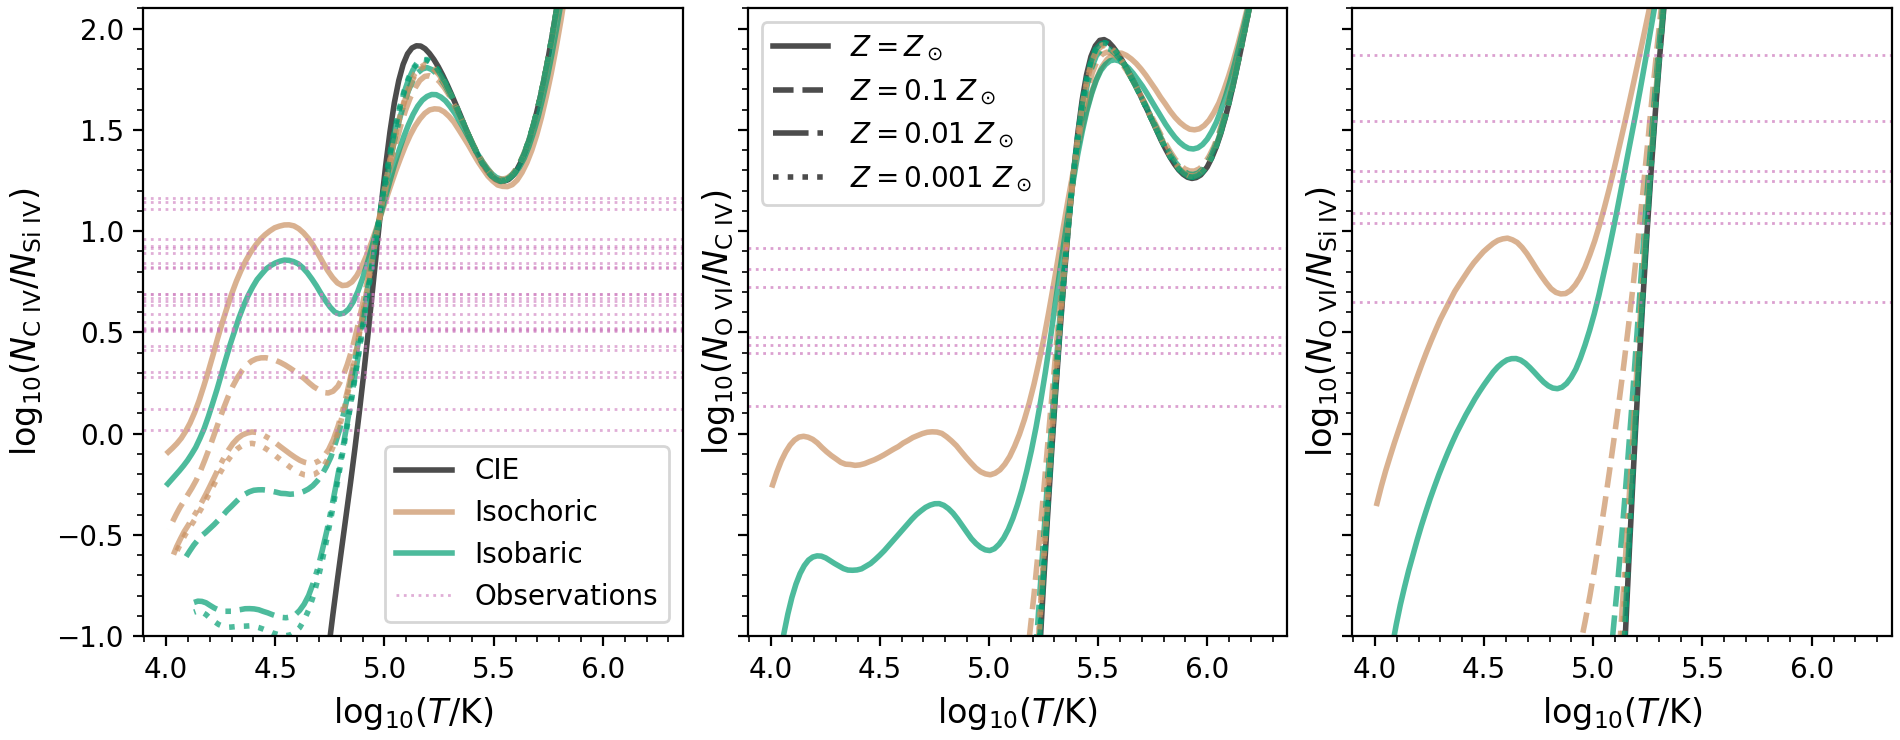

In [83]:
fig,axs = plt.subplots(1,3, figsize = (9.5,3.7), constrained_layout = True, sharex = True, sharey = True)

ax = axs[0]

ax.plot(np.log10(CIE_T), CIV_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), CIV_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), CIV_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), CIV_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), CIV_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), CIV_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), CIV_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), CIV_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), CIV_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["CIV_to_SiIV"][good_col_meas_mask]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1, 
                   label = "Observations")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.6, ls = ":", lw = 1)

# ax.axhline(-3, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
# ax.axhline(-3, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
# ax.axhline(-3, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
# ax.axhline(-3, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 1, loc = 4)

# ax.set_ylim(-1.5,2.5)

ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{C~IV} / N_\mathrm{Si~IV})$", fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax = axs[1]

ax.plot(np.log10(CIE_T), OVI_to_CIV_CIE, lw = 2, color = "k", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), OVI_to_CIV_ISOCh_Z1, lw = 2, color = pal[5],alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), OVI_to_CIV_ISOB_Z1, lw = 2, color = pal[2], alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_CIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), OVI_to_CIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_CIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), OVI_to_CIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_CIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), OVI_to_CIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["OVI_to_CIV"][good_col_meas_mask_OC]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)
    else:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)

ax.axhline(-8, lw = 2, ls = "-", color = "k", alpha = 0.7, label = r"$Z = Z_\odot$")
ax.axhline(-8, lw = 2, ls = "--", color = "k", alpha = 0.7, label = r"$Z = 0.1~Z_\odot$")
ax.axhline(-8, lw = 2, ls = "-.", color = "k", alpha = 0.7, label = r"$Z = 0.01~Z_\odot$")
ax.axhline(-8, lw = 2, ls = ":", color = "k", alpha = 0.7, label = r"$Z = 0.001~Z_\odot$")


lg = ax.legend(fontsize = 10, ncol = 1, loc = 2)


ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{C~IV})$", fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax = axs[2]

ax.plot(np.log10(CIE_T), OVI_to_SiIV_CIE, lw = 2, color = "k", label = "CIE", alpha = 0.7)


ax.plot(np.log10(ISOCh_Z1_T), OVI_to_SiIV_ISOCh_Z1, lw = 2, color = pal[5], 
        label = "Isochoric", alpha = 0.7)
ax.plot(np.log10(ISOB_Z1_T), OVI_to_SiIV_ISOB_Z1, lw = 2, color = pal[2], 
        label = "Isobaric", alpha = 0.7)

ax.plot(np.log10(ISOCh_Zp1_T), OVI_to_SiIV_ISOCh_Zp1, lw = 2, color = pal[5], alpha = 0.7, ls = "--")
ax.plot(np.log10(ISOB_Zp1_T), OVI_to_SiIV_ISOB_Zp1, lw = 2, color = pal[2], alpha = 0.7, ls = "--")


ax.plot(np.log10(ISOCh_Zp01_T), OVI_to_SiIV_ISOCh_Zp01, lw = 2, color = pal[5], alpha = 0.7, ls = "-.")
ax.plot(np.log10(ISOB_Zp01_T), OVI_to_SiIV_ISOB_Zp01, lw = 2, color = pal[2], alpha = 0.7, ls = "-.")

ax.plot(np.log10(ISOCh_Zp001_T), OVI_to_SiIV_ISOCh_Zp001, lw = 2, color = pal[5], alpha = 0.7, ls = ":")
ax.plot(np.log10(ISOB_Zp001_T), OVI_to_SiIV_ISOB_Zp001, lw = 2, color = pal[2], alpha = 0.7, ls = ":")


for ell,y in enumerate(full_ideal_res["OVI_to_SiIV"][good_col_meas_mask_OS]):
    if ell == 0:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1, 
                   label = r"Observed $N_\mathrm{O~VI} / N_\mathrm{Si~IV}$")
    else:
        ax.axhline(y, color = pal[4], alpha = 0.7, ls = ":", lw = 1)



ax.set_xlabel(r"$\log_{10}(T/\mathrm{K})$", fontsize = 12)
ax.set_ylabel(r"$\log_{10}(N_\mathrm{O~VI} / N_\mathrm{Si~IV})$", fontsize = 12)

ax.set_ylim(-1,2.1)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))


fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/png/ExtFigure3.png", 
            dpi = 300, transparent = True)
fig.savefig("/Users/dk/Dropbox/STScI/Research/MagCorona/ScienceFigures/vSubmit/svg/ExtFigure3.svg", 
            transparent = True)

In [16]:
CIE_OVI.max(),ISOB_Zp1_OVI.max(),ISOCh_Zp1_OVI.max()

(0.215, 0.183, 0.168)

In [21]:
HII_to_OVI_CIE[CIE_OVI.argmax()], HII_to_OVI_ISOB_Zp1[ISOB_Zp1_OVI.argmax()], HII_to_OVI_ISOCh_Zp1[ISOCh_Zp1_OVI.argmax()]





(3.977561540084398, 5.0475489102695725, 5.084690718274139)

In [23]:
np.log10([CIE_T[CIE_OVI.argmax()], ISOB_Zp1_T[ISOB_Zp1_OVI.argmax()], ISOCh_Zp1_T[ISOCh_Zp1_OVI.argmax()]])





array([5.46733723, 5.47000011, 5.47377738])

In [ ]:
N_HII_from_OVI = 

In [41]:
full_ideal_res["B_OVI"]

<Quantity [16.47159484, 27.54834688,         nan,         nan,         nan,
           34.47925905, 26.07380829,         nan,         nan,         nan,
                   nan,         nan,         nan,         nan, 31.16838869,
                   nan,         nan,         nan,         nan,         nan,
                   nan,         nan,         nan,         nan,         nan,
                   nan,         nan,         nan,         nan,         nan,
                   nan,         nan,         nan,         nan,         nan,
                   nan,         nan,         nan,         nan] km / s>

In [46]:
good_OVI = np.invert(np.isnan(full_ideal_res["MEAS_N_OVI"]))

In [48]:
full_ideal_res[good_OVI]["SOURCE"]

1H0419-577
1H0419-577
ESO031-G08
ESO031-G08
HE0226-4110
HE0226-4110
IRAS_F21325-6237
